In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

## Deja vu

Deja vu literally translates to "already seen." It's that feeling of having been there before, and done it before.

It's a feeling that you might get in portions of this lesson. That's because time is something that you've dealt with before. Many of the data sources that you've worked with in this program involve some element of time, and you've even learned some ways to deal with it already. So, before you get too involved with all of the specialized techniques and concepts in this module, take a moment to review what you've already learned. Consider how you can use what you've learned in terms of time.

## Plotting time

So far in this program, you've gotten a lot of practice plotting variables. Fortunately, the techniques that you've learned are still valid in a time-dependent context.

You can still make a scatter plot.

You can still make a bar plot.

In fact, you can still do almost everything that you've done before.

It is worth noting, however, that some plots are better than others at representing a relationship with time. Time is a relationship; it implies that one point, one observation, is related to another in a typically linear, directed sense. You want your plots to reflect that relationship.

Use the following code to create a basic dataset to use as an example; you can imagine that this dataset tracks how much you've learned over time while taking this program.

In [2]:
# Create a DataFrame.
learning_progress = pd.DataFrame()

# Add a range of 100 dates, starting January 1, 2017.
learning_progress['date'] = pd.date_range(start='2017-01-01', periods=100)

# Add linearly increasing `knowledge` and oscillating `confidence`.
learning_progress['knowledge'] = np.arange(0, 100)
learning_progress['confidence'] = 10 * np.cos(np.arange(0, 100) * np.pi / 7) + np.arange(0, 100)

Now, you've seen data like this before. And there are many ways that you could plot it, each one reflecting its own relationships or lack thereof. Take a look at three potential plots below.

Text(0.5, 1.0, 'Scatter Plot')

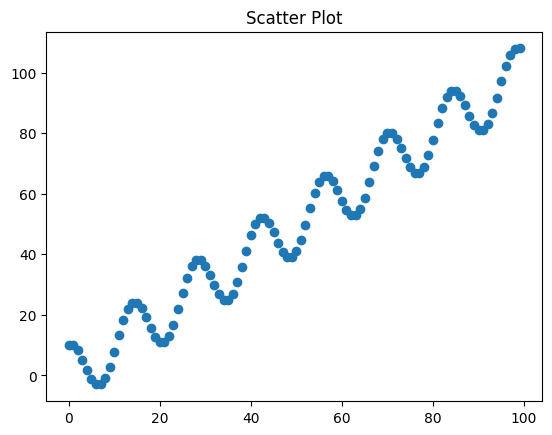

In [3]:
plt.scatter(learning_progress.knowledge, learning_progress.confidence)
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Linked Scatter Plot')

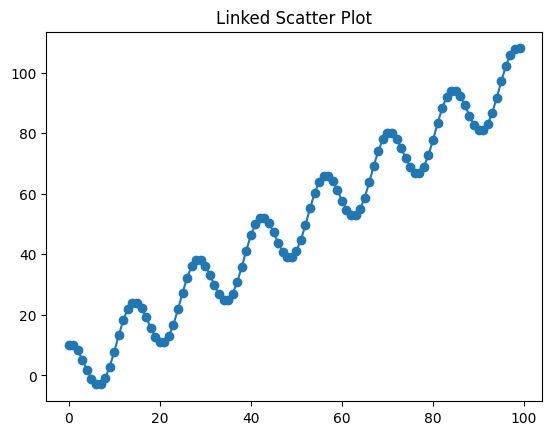

In [9]:
plt.scatter(learning_progress.knowledge, learning_progress.confidence)
plt.plot(learning_progress.knowledge, learning_progress.confidence)
plt.title('Linked Scatter Plot')

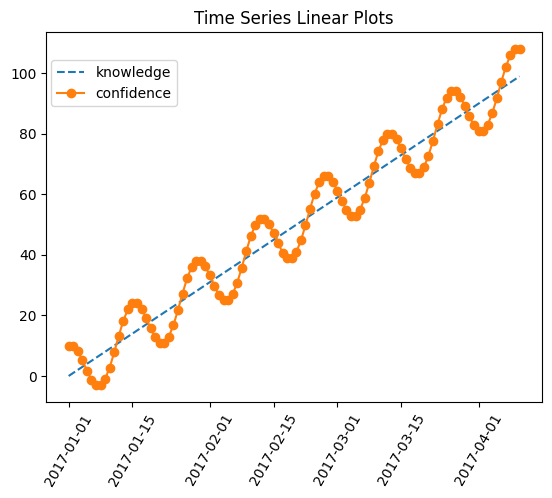

In [5]:
plt.plot(learning_progress.date, learning_progress.knowledge, '--', label="knowledge")
plt.plot(learning_progress.date, learning_progress.confidence, 'o-', label="confidence")
plt.xticks(rotation=60)
plt.legend(loc = (.01,.8))
plt.title('Time Series Linear Plots')
plt.show()

As you can see, there are a lot of plots that you can make with this data (and you could make many more). But not all plots are created equal.

Take that first scatter plot. It seems to have a trend, but it doesn't imply any relationship between the points themselves. You don't know how each point is related to the one next to it; all you can do is guess.

The second plot has a bit more information. It's still a scatter plot, but the dots are connected (actually by overlaying a line), implying a progression from point to point. One point goes to another, which goes to the next. This gives you a little more information than the previous plot was able to convey.

The third plot has a time-based axis. This is nice because it gives a real sense of the scale of time. However, you lose some of the scatter-like relationship between the two variables. Instead, their equivalence is shown by having them marked at the same date along the timeline.

None of these plots is "right" or "wrong" per se. They're just all different. When you deal with data like this, you have to decide what you want to show and how to best tell your story, while noting that the inclusion of time does affect those processes.

## Things get messy

One of the most common complaints about Python, at least from an analytics perspective, is time. Specifically, the way that Python handles time as a data type can be confusing. Really, the issue stems from the fact that there *isn't* one single date type in Python. There are several. For the most part, you'll want to rely on the date and time tools that pandas gives you. However, in the wild, you'll run into time stamps. Or time deltas. Or [Unix epoch time](https://en.wikipedia.org/wiki/Unix_time). And your time data may be *naive* or *aware*, representing two different Python object types. Here's how [the Python docs](https://docs.python.org/3/library/datetime.html) describe these two object types:

>An *aware object* has sufficient knowledge of applicable algorithmic and political time adjustments, such as time zone and daylight saving time information, to locate itself relative to other aware objects. An aware object is used to represent a specific moment in time that is not open to interpretation.
>
>A *naive object* does not contain enough information to unambiguously locate itself relative to other date/time objects. Whether a naive object represents Coordinated Universal Time (UTC), local time, or time in some other timezone is purely up to the program, just like it is up to the program whether a particular number represents metres, miles, or mass. Naive objects are easy to understand and to work with, at the cost of ignoring some aspects of reality.

As you can see, on top of the complexity of your underlying data, there are also numerous formatting options for displaying the time with or without time zones.

In general, this program will try to stick with pandas' ways of handling time. You can use the [`pd.to_datetime()` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to get you out of a jam when you find yourself dealing with something else that isn't quite behaving in the way you want. This program won't dive deeply into time zones, but if you work with time a lot, there are plenty of rabbit holes for you to go down. Dealing with time zones can be a tricky topic, as suggested in [this xkcd comic](https://xkcd.com/1883/):

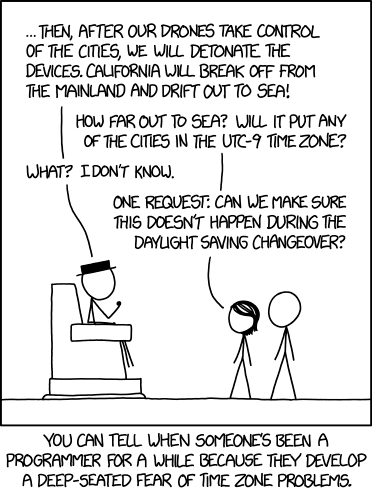

## Concerns of time

Time is not a variable like every other. It has specific concerns. Before you learn about how to model those concerns, you need to identify what they are. This will directly affect how you model them.

- **Trends** are probably the most common concern with time. Things change over time, and a trend is a way to quantify how that change is occurring. Sometimes, that trend will be linear; other times, it may have a different functional form. The key is that the data is moving in a direction as time passes, and understanding the direction and speed of that change can fundamentally affect a business.

- **Seasonality** is another concept that you've encountered before. This is the idea that there is a repeating pattern over some period of time. Ice cream sales are higher in summer than in winter. Retail sales might be stronger on the weekends, or people might tend to miss morning appointments. Seasonality concerns arise whenever you have a repeating pattern over a set, consistent period of time, whether that time period is a season, a week, a day, or an hour.

- **Events** are the final type of concern that you'll learn about here. Events are a moment in time where everything changes. It can be a phase shift, a shock, or a total change of directions. What it means practically is that what comes before is not the same as what comes after. How that change manifests depends on the data, but the inclusion of time allows you to find events and adjust accordingly.

## Basics of modeling time

Now that you're familiar with time as a concept, you're ready to learn how to include it in your models. After all, you've spent so much of this program covering how to build various models; it would be quite a shame if you didn't learn how to model time. For this, you'll work with the same *learning_progress* dataset as before.

In [10]:
# Create a DataFrame.
learning_progress = pd.DataFrame()

# Add a range of 100 dates, starting January 1, 2017.
learning_progress['date'] = pd.date_range(start='2017-01-01', periods=100)

# Add linearly increasing `knowledge` and oscillating `confidence`.
learning_progress['knowledge'] = np.arange(0, 100)
learning_progress['confidence'] = 10 * np.cos(np.arange(0, 100) * np.pi / 3.5) + np.arange(0, 100)

Now, this is an extremely simple example scenario, and you can easily see the time series trends that are being introduced into the data from the code. But how can you model them?

In this case, you'll be working with a linear model. It is also worth noting that time series work is often done with least squares linear models (and their extensions) because of their explanatory power. How things change over time is often a key learning from these models.

## Linear trends

Perhaps the most intuitive way to deal with time series data is with a simple linear trend. This treats time just like any other variable. Imagine that you want to explain variance in confidence over time.

That model could look something like this:

In [11]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

# Note that for scikit-learn, you must convert your data to numeric.
X = pd.DataFrame(pd.to_numeric(learning_progress['date']))
Y = learning_progress['confidence']
lm.fit(X, Y)
lm.score(X, Y)

0.9434054498353519

In [12]:
lm.coef_[0]

1.1616248770977109e-14

In [13]:
# Convert coefficient from nanoseconds to days.
lm.coef_[0] * 1000000000 * 24 * 60 * 60

1.0036438938124221

So there are a few things to note here. Firstly, scikit-learn requires all inputs to be numeric, so you have to convert your time stamps to numeric. The `pd.to_numeric` method will do the job, converting the column to nanoseconds since January 1, 1970 (also referred to as *epoch time in nanoseconds*, because typical epoch time is simply in seconds). This still allows you to model the same linear trend, but you have to interpret your coefficient either in nanoseconds or with a conversion.

You could do the same kind of feature engineering on this feature, taking any functional form or normalizing to a starting point.

What does this coefficient mean? For linear regression, the coefficients are the values that multiply the predictors ($x$). For example, in `2x + 3`, `2` is the coefficient that will show the relationship between the predictor and output.

However, this is only one way to deal with time.

## Indicators

So far, you've only dealt with a *trend*. This means something changing in a functional direction over time. However, when you deal with time, a lot of what you're looking for is a pattern or *seasonality*. There are two traditional ways to deal with this.

The first is with *indicator variables*, which are basically dummy variables that show whether you are in a specified time of year or not.

The simplest way to do this is to create an indicator for every period of the season. This can be an indicator for each day of the week if you're concerned about a weekly cycle. Or it can be for every month of the year if you're worried about months. It can even be for the four literal seasons if that's what fits your data.

The advantage of this is also its disadvantage. You get a coefficient to adjust for every period in your seasonality, allowing you to get a very specified fit; however, this does open you up to overfitting.

You want to make sure that you have enough data to avoid creating a problem for yourself with these kinds of indicators. For example, if you only have one data point in each period, you'll get a perfect fit and a model that is pretty useless.

Take a look at how you could do it with the *learning_progress* dataset.

Here, imagine that you want to model confidence in terms of time.

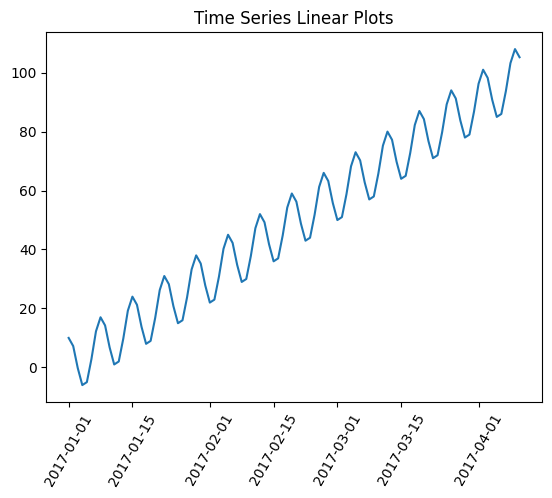

In [14]:
plt.plot(learning_progress.date, learning_progress.confidence)
plt.xticks(rotation=60)
plt.title('Time Series Linear Plots')
plt.show()

This looks like it follows a weekly pattern. Below, model it in terms of two factors: a trend line and a day-of-the-week indicator. To get the indicator, you can extract the day of the week from your dates, and then convert it to a series of dummy variables.

In [15]:
learning_progress['day_of_week'] = learning_progress.date.apply(
    lambda x: str(dt.datetime.weekday(x)))

X = pd.get_dummies(learning_progress.day_of_week)
X['date'] = pd.to_numeric(learning_progress.date) / (1000000000 * 24 * 60 * 60)
Y = learning_progress['confidence']
lm.fit(X, Y)
lm.score(X, Y)

1.0

In [16]:
print(X.columns)
print(lm.coef_)

Index(['0', '1', '2', '3', '4', '5', '6', 'date'], dtype='object')
[ 6.23489802 -2.22520934 -9.00968868 -9.00968868 -2.22520934  6.23489802
 10.          1.        ]


Here you can see a series of coefficients for each day of the week (with `0` corresponding to Monday). So you can see that Mondays have higher confidence than Tuesdays through Friday, with the confidence level recovering again over the weekend. On top of that, there is a daily trend, with confidence increasing at an average of 1 unit per day.

All of this has a model score of `1.0`, by the way; this is the exact equation used to create the data, if you discretize the oscillating function.

## Oscillators

You can also use trigonometric functions. Specifically, you can use sine and cosine.

These functions are *oscillating functions*. They have a *period* and an *amplitude*.

Text(0.5, 1.0, 'Cosine Function')

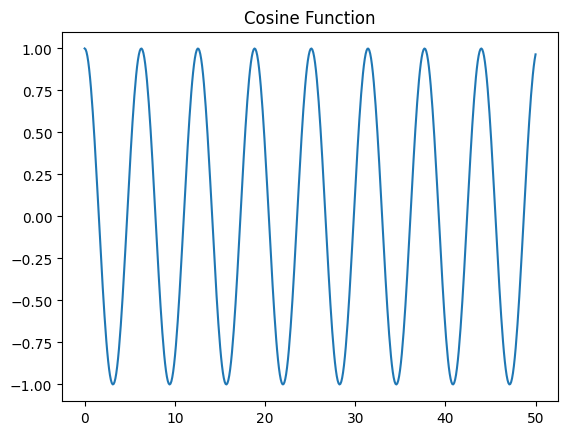

In [17]:
x = np.linspace(0, 50, 500)
plt.plot(x, np.cos(x))
plt.title('Cosine Function')

## A brief visit to trigonometry

You may remember *sine* and *cosine* functions from previous math courses. They're derived from relationships from within triangles. How exactly that works isn't important for this purpose; you aren't using them for their trigonometric properties. What's important is that they're regularly repeating oscillating waves where you can control the height of the oscillations and their frequency. To that end, these waves have two features that you need to know:

- **Amplitude** is how high the curve goes. For the purposes of this module, that is how big its oscillations move from the center. In the image above, the amplitude is `1`.

- **Period** is how long an oscillation is, or the length of the repeating pattern. In the image above, the period is $2\pi$.

When you're working with a linear model and you see something that oscillates regularly and in a symmetric fashion, it might be useful to use a sine transformation and see if you can draw out periodicity. This can add a regular wiggle or movement up or down, say within a week or a season, to any other linear trends that you may have. You have to find the duration of the oscillation yourself before applying the cosine or sine transformation.

Try it with the *learning_progress* data:

In [18]:
X = pd.DataFrame()
X['date'] = pd.to_numeric(learning_progress.date) / (1000000000 * 24 * 60 * 60)

# Note that you're subtracting 17,167 from `date`.
# This is to normalize it so that it starts at zero.
# This aligns the peak of the curve with the start of the cosine function.

X['cos_date'] = np.cos((X.date - 17167) * np.pi / 3.5)
Y = learning_progress['confidence']
lm.fit(X, Y)
lm.score(X, Y)

1.0

In [19]:
lm.coef_

array([ 1., 10.])


So, how do you find the duration of an oscillation? Well, the easiest way is to have its period be present in the data. Things that repeat weekly have a weekly period. However, sometimes the period isn't so clear. For example, you may see something monthly that doesn't seem to perfectly line up with a clear start and end at the beginning of the month—though you still see a regularly oscillating curve.

In that case, you'll need [spectral analysis](https://en.wikipedia.org/wiki/Spectral_density_estimation). Implementing spectral analysis is beyond the scope of this specialization; in practice, you can often obtain a reasonable estimation through indicators and other techniques.

The main value of these trigonometric terms for seasonality is that they avoid overfitting by offering only a single term to match—the amplitude. Perhaps you're also manually estimating the period. But other than that, there is nowhere near the number of opportunities for overfitting compared to, say, 12 indicators for each month of the year.

## Drill: What are the seasons?

Look at the *learning_progress* data, and analyze it to figure out how big a cycle is. Use your programming skills to derive the cycle time rather than looking at the code used to create the series.


In [23]:
!pip install cydets

  Preparing metadata (setup.py) ... done
  Created wheel for cydets: filename=cydets-1.1-py3-none-any.whl size=6184 sha256=82f7447894ba8a7dc51e3e3714f2213b28f3e1c2dce8720fba4cb369faec0f7e
  Stored in directory: /root/.cache/pip/wheels/41/73/9a/76becf744a61804b931e02fdb46c28df68c3f8184d90555c8c
Successfully built cydets


In [25]:
# Look at cycles through an example in cydets
# See: https://medium.com/data-science-in-your-pocket/mathematically-determining-patterns-in-time-series-with-codes-1334954ae8eb

import pandas as pd
from cydets.algorithm import detect_cycles
# create sample data
series = pd.Series([0, 1, 0, 0.5, 0, 1, 0, 0.5, 0, 1, 0])
# detect cycles
cycles = detect_cycles(series)
cycles

,t_start,t_end,t_minimum,doc,duration
0,1,5,2,1.0,4
1,3,5,4,0.5,2
2,5,9,6,1.0,4
3,7,9,8,0.5,2


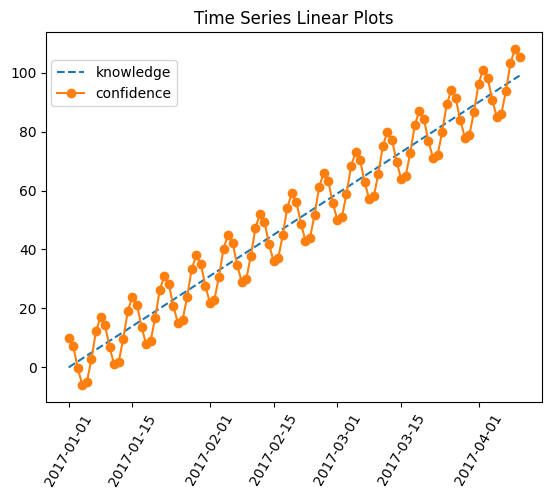

In [26]:
# Our data in learning_progress
plt.plot(learning_progress.date, learning_progress.knowledge, '--', label="knowledge")
plt.plot(learning_progress.date, learning_progress.confidence, 'o-', label="confidence")
plt.xticks(rotation=60)
plt.legend(loc = (.01,.8))
plt.title('Time Series Linear Plots')
plt.show()

In [30]:
# Cycles in learning_progress data
# Note: learning_progress['knowledge'] is linear line so we don't need to measure its cycles (it doesn't have oscillating peaks and valleys)
# Similarly, it doesn't make a lot of sense to look at cycles in learning_progress['date']

# The confidence series is an oscillating function with peaks and valleys
knowledge_cycles = detect_cycles(learning_progress['confidence'])
# A full cycle is 98 days while individual cycles happen every 7 days
knowledge_cycles

,t_start,t_end,t_minimum,doc,duration
0,0,98,3,0.140424,98
1,7,14,10,0.140424,7
2,14,21,17,0.140424,7
3,21,28,24,0.140424,7
4,28,35,31,0.140424,7
5,35,42,38,0.140424,7
6,42,49,45,0.140424,7
7,49,56,52,0.140424,7
8,56,63,59,0.140424,7
9,63,70,66,0.140424,7


In [32]:
# We can also see 7 day cycles in the oscillations of the cosine function.
detect_cycles(X['cos_date'])

,t_start,t_end,t_minimum,doc,duration
0,0,7,4,1.0,7
1,7,14,11,1.0,7
2,14,21,17,1.0,7
3,21,28,25,1.0,7
4,28,35,32,1.0,7
5,35,42,39,1.0,7
6,42,49,46,1.0,7
7,49,56,52,1.0,7
8,56,63,60,1.0,7
9,63,70,67,1.0,7
